In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./DF_SPLIT/건물_30년 이하.csv')
df.drop('건물연식',axis=1,inplace=True)
# Train : 2016-2020
# Test : 2021-2022

df['계약일'] = pd.to_datetime(df['계약일'])
train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']
# Train Split
# feature & target  split
X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']
# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

# Test Split
# feature & target  split
X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']
# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif


# OLS - Scaling 후

## OLS_1

In [2]:
# R_OLS_1
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               399405
Model:                            RLM   Df Residuals:                   399386
Method:                          IRLS   Df Model:                           18
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        14:52:02                                         
No. Iterations:                    26                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5098      0.008    545.201      0.000       4.494       4.526
건물면적(㎡)               2.1574      0.004    579.327      0.000       2.150       2.165
층                     0.3529      0.003    115.710      0.000       0.347       0.359
KOSPI종가               0.0283      0.006      4.414      0.000       0.016       0.041
Fed기준금리              -0.1277      0.004    -34.480      0.000      -0.135      -0.120
국제유가(Dubai)($/배럴)     0.1257      0.004     34.602      0.000       0.119       0.133
부동산거래량                0.0260      0.002     13.260      0.000       0.022       0.030
국고채5년(평균)            -0.2204      0.020    -11.198      0.000      -0.259      -0.182
국고채10년(평균)            0.1869      0.014     13.069      0.000       0.159       0.215
회사채3년(평균)             0.1049      0.006     18.070      0.000       0.093       0.116
CD91물(평균)            -0.0513      0.008     -6.073      0.000      -0.068      -0.035
BOK기준금리              -0.0839      0.007    -11.900      0.000      -0.098      -0.070
GDP대비가계부채비율           0.0257      0.006      4.295      0.000       0.014       0.037
환율종가                  0.0180      0.003      5.782      0.000       0.012       0.024
선행지수순환변동치             0.1112      0.005     23.753      0.000       0.102       0.120
EPU                  -0.0015      0.002     -0.771      0.441      -0.005       0.002
장단기금리spread          -0.2141      0.009    -24.072      0.000      -0.232      -0.197
금값종가                 -0.0125      0.006     -2.139      0.032      -0.024      -0.001
LTV                  -0.2419      0.002   -113.250      0.000      -0.246      -0.238
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [4]:
X_scaled.drop('EPU', axis=1, inplace=True)

In [5]:
# R_OLS_2
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               399405
Model:                            RLM   Df Residuals:                   399387
Method:                          IRLS   Df Model:                           17
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        14:52:42                                         
No. Iterations:                    40                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5084      0.008    558.828      0.000       4.493       4.524
건물면적(㎡)               2.1574      0.004    579.310      0.000       2.150       2.165
층                     0.3529      0.003    115.704      0.000       0.347       0.359
KOSPI종가               0.0287      0.006      4.487      0.000       0.016       0.041
Fed기준금리              -0.1273      0.004    -34.603      0.000      -0.135      -0.120
국제유가(Dubai)($/배럴)     0.1250      0.004     35.432      0.000       0.118       0.132
부동산거래량                0.0265      0.002     14.149      0.000       0.023       0.030
국고채5년(평균)            -0.2238      0.019    -11.649      0.000      -0.261      -0.186
국고채10년(평균)            0.1882      0.014     13.249      0.000       0.160       0.216
회사채3년(평균)             0.1061      0.006     18.957      0.000       0.095       0.117
CD91물(평균)            -0.0505      0.008     -6.025      0.000      -0.067      -0.034
BOK기준금리              -0.0832      0.007    -11.901      0.000      -0.097      -0.069
GDP대비가계부채비율           0.0253      0.006      4.241      0.000       0.014       0.037
환율종가                  0.0173      0.003      5.793      0.000       0.011       0.023
선행지수순환변동치             0.1115      0.005     23.871      0.000       0.102       0.121
장단기금리spread          -0.2134      0.009    -24.145      0.000      -0.231      -0.196
금값종가                 -0.0120      0.006     -2.071      0.038      -0.023      -0.001
LTV                  -0.2420      0.002   -113.341      0.000      -0.246      -0.238
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [6]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

     VIF_Factor            Feature
0      6.396782            건물면적(㎡)
1      4.975768                  층
2    156.508010            KOSPI종가
3     51.259010            Fed기준금리
4     62.083340  국제유가(Dubai)($/배럴)
5      9.700013             부동산거래량
6   1182.477355          국고채5년(평균)
7    837.818174         국고채10년(평균)
8    121.816941          회사채3년(평균)
9    283.582882          CD91물(평균)
10   257.583494            BOK기준금리
11   102.709817        GDP대비가계부채비율
12    23.500146               환율종가
13   124.236271          선행지수순환변동치
14   209.258633        장단기금리spread
15    63.651791               금값종가
16    29.521702                LTV


In [7]:
X_scaled.drop('국고채5년(평균)', axis=1, inplace=True)

In [8]:
# R_OLS_3
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               399405
Model:                            RLM   Df Residuals:                   399388
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        14:53:42                                         
No. Iterations:                    36                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5502      0.007    629.040      0.000       4.536       4.564
건물면적(㎡)               2.1577      0.004    579.321      0.000       2.150       2.165
층                     0.3529      0.003    115.693      0.000       0.347       0.359
KOSPI종가               0.0286      0.006      4.466      0.000       0.016       0.041
Fed기준금리              -0.1376      0.004    -38.645      0.000      -0.145      -0.131
국제유가(Dubai)($/배럴)     0.1223      0.004     34.755      0.000       0.115       0.129
부동산거래량                0.0286      0.002     15.329      0.000       0.025       0.032
국고채10년(평균)            0.0576      0.009      6.731      0.000       0.041       0.074
회사채3년(평균)             0.0883      0.005     16.354      0.000       0.078       0.099
CD91물(평균)            -0.0890      0.008    -11.486      0.000      -0.104      -0.074
BOK기준금리              -0.1171      0.006    -18.417      0.000      -0.130      -0.105
GDP대비가계부채비율           0.0429      0.006      7.442      0.000       0.032       0.054
환율종가                  0.0285      0.003     10.063      0.000       0.023       0.034
선행지수순환변동치             0.1174      0.005     25.325      0.000       0.108       0.127
장단기금리spread          -0.2803      0.007    -41.542      0.000      -0.294      -0.267
금값종가                 -0.0271      0.006     -4.807      0.000      -0.038      -0.016
LTV                  -0.2373      0.002   -112.791      0.000      -0.241      -0.233
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [10]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.371268            건물면적(㎡)
1     4.969288                  층
2   152.746813            KOSPI종가
3    45.904786            Fed기준금리
4    61.969156  국제유가(Dubai)($/배럴)
5     9.677751             부동산거래량
6   247.914876         국고채10년(평균)
7   113.061824          회사채3년(평균)
8   276.181257          CD91물(평균)
9   236.330757            BOK기준금리
10   87.441351        GDP대비가계부채비율
11   16.150920               환율종가
12  121.406446          선행지수순환변동치
13  151.704287        장단기금리spread
14   62.404501               금값종가
15   24.697263                LTV


In [11]:
X_scaled.drop('국고채10년(평균)', axis=1, inplace=True)

In [12]:
# R_OLS_4
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               399405
Model:                            RLM   Df Residuals:                   399389
Method:                          IRLS   Df Model:                           15
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        14:54:22                                         
No. Iterations:                    27                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5284      0.006    697.373      0.000       4.516       4.541
건물면적(㎡)               2.1577      0.004    579.225      0.000       2.150       2.165
층                     0.3530      0.003    115.686      0.000       0.347       0.359
KOSPI종가               0.0309      0.006      4.843      0.000       0.018       0.043
Fed기준금리              -0.1368      0.004    -38.461      0.000      -0.144      -0.130
국제유가(Dubai)($/배럴)     0.1224      0.004     34.777      0.000       0.115       0.129
부동산거래량                0.0267      0.002     14.490      0.000       0.023       0.030
회사채3년(평균)             0.1120      0.004     26.962      0.000       0.104       0.120
CD91물(평균)            -0.0569      0.006     -9.252      0.000      -0.069      -0.045
BOK기준금리              -0.1217      0.006    -19.275      0.000      -0.134      -0.109
GDP대비가계부채비율           0.0439      0.006      7.630      0.000       0.033       0.055
환율종가                  0.0329      0.003     11.929      0.000       0.028       0.038
선행지수순환변동치             0.1339      0.004     33.740      0.000       0.126       0.142
장단기금리spread          -0.2629      0.006    -42.426      0.000      -0.275      -0.251
금값종가                 -0.0325      0.006     -5.819      0.000      -0.043      -0.022
LTV                  -0.2358      0.002   -112.726      0.000      -0.240      -0.232
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [13]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.346800            건물면적(㎡)
1     4.961118                  층
2   150.811429            KOSPI종가
3    44.628631            Fed기준금리
4    61.950734  국제유가(Dubai)($/배럴)
5     9.557955             부동산거래량
6    49.463109          회사채3년(평균)
7   208.495709          CD91물(평균)
8   218.784354            BOK기준금리
9    85.283681        GDP대비가계부채비율
10   16.133665               환율종가
11   87.003992          선행지수순환변동치
12  145.344385        장단기금리spread
13   58.594504               금값종가
14   24.147896                LTV


In [14]:
X_scaled.drop('BOK기준금리', axis=1, inplace=True)

In [15]:
# R_OLS_5
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               399405
Model:                            RLM   Df Residuals:                   399390
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        14:55:07                                         
No. Iterations:                    32                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4824      0.006    740.577      0.000       4.471       4.494
건물면적(㎡)               2.1596      0.004    579.693      0.000       2.152       2.167
층                     0.3535      0.003    115.848      0.000       0.348       0.360
KOSPI종가               0.0148      0.006      2.346      0.019       0.002       0.027
Fed기준금리              -0.1524      0.003    -44.104      0.000      -0.159      -0.146
국제유가(Dubai)($/배럴)     0.1109      0.003     31.986      0.000       0.104       0.118
부동산거래량                0.0304      0.002     16.583      0.000       0.027       0.034
회사채3년(평균)             0.0912      0.004     22.690      0.000       0.083       0.099
CD91물(평균)            -0.1294      0.005    -26.405      0.000      -0.139      -0.120
GDP대비가계부채비율           0.1002      0.005     20.202      0.000       0.090       0.110
환율종가                  0.0394      0.003     14.367      0.000       0.034       0.045
선행지수순환변동치             0.1237      0.004     31.414      0.000       0.116       0.131
장단기금리spread          -0.2163      0.006    -37.805      0.000      -0.227      -0.205
금값종가                 -0.0423      0.006     -7.595      0.000      -0.053      -0.031
LTV                  -0.2270      0.002   -110.778      0.000      -0.231      -0.223
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [16]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.339480            건물면적(㎡)
1     4.958177                  층
2   136.549921            KOSPI종가
3    43.543279            Fed기준금리
4    59.241339  국제유가(Dubai)($/배럴)
5     9.361987             부동산거래량
6    49.113756          회사채3년(평균)
7    62.106812          CD91물(평균)
8    69.264575        GDP대비가계부채비율
9    15.985837               환율종가
10   86.593514          선행지수순환변동치
11  135.136417        장단기금리spread
12   56.010227               금값종가
13   24.138165                LTV


In [17]:
X_scaled.drop('KOSPI종가', axis=1, inplace=True)

In [18]:
# R_OLS_6
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               399405
Model:                            RLM   Df Residuals:                   399391
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        14:55:45                                         
No. Iterations:                    42                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4888      0.005    827.619      0.000       4.478       4.499
건물면적(㎡)               2.1594      0.004    579.858      0.000       2.152       2.167
층                     0.3535      0.003    115.849      0.000       0.348       0.359
Fed기준금리              -0.1515      0.003    -44.152      0.000      -0.158      -0.145
국제유가(Dubai)($/배럴)     0.1118      0.003     32.426      0.000       0.105       0.119
부동산거래량                0.0316      0.002     17.861      0.000       0.028       0.035
회사채3년(평균)             0.0962      0.003     28.000      0.000       0.089       0.103
CD91물(평균)            -0.1322      0.005    -27.814      0.000      -0.141      -0.123
GDP대비가계부채비율           0.0993      0.005     20.072      0.000       0.090       0.109
환율종가                  0.0373      0.003     14.460      0.000       0.032       0.042
선행지수순환변동치             0.1303      0.003     46.469      0.000       0.125       0.136
장단기금리spread          -0.2219      0.005    -42.484      0.000      -0.232      -0.212
금값종가                 -0.0384      0.005     -7.218      0.000      -0.049      -0.028
LTV                  -0.2285      0.002   -116.784      0.000      -0.232      -0.225
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [19]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.326018            건물면적(㎡)
1     4.950001                  층
2    43.510666            Fed기준금리
3    57.140333  국제유가(Dubai)($/배럴)
4     8.786348             부동산거래량
5    41.544977          회사채3년(평균)
6    60.355763          CD91물(평균)
7    69.181066        GDP대비가계부채비율
8    15.697011               환율종가
9    41.480280          선행지수순환변동치
10  123.519057        장단기금리spread
11   41.162892               금값종가
12   23.873329                LTV


In [20]:
X_scaled.drop('장단기금리spread', axis=1, inplace=True)

In [21]:
# R_OLS_7
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               399405
Model:                            RLM   Df Residuals:                   399392
Method:                          IRLS   Df Model:                           12
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        14:56:20                                         
No. Iterations:                    37                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4369      0.005    838.211      0.000       4.427       4.447
건물면적(㎡)               2.1620      0.004    579.187      0.000       2.155       2.169
층                     0.3548      0.003    115.973      0.000       0.349       0.361
Fed기준금리              -0.1039      0.003    -31.966      0.000      -0.110      -0.098
국제유가(Dubai)($/배럴)     0.0691      0.003     20.883      0.000       0.063       0.076
부동산거래량                0.0093      0.002      5.479      0.000       0.006       0.013
회사채3년(평균)            -0.0309      0.002    -18.380      0.000      -0.034      -0.028
CD91물(평균)            -0.0868      0.005    -18.703      0.000      -0.096      -0.078
GDP대비가계부채비율           0.0955      0.005     19.261      0.000       0.086       0.105
환율종가                  0.0226      0.003      8.808      0.000       0.018       0.028
선행지수순환변동치             0.0550      0.002     25.304      0.000       0.051       0.059
금값종가                  0.0026      0.005      0.492      0.623      -0.008       0.013
LTV                  -0.2118      0.002   -110.391      0.000      -0.216      -0.208
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [22]:
X_scaled.drop('금값종가', axis=1, inplace=True)

In [23]:
# R_OLS_8
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               399405
Model:                            RLM   Df Residuals:                   399393
Method:                          IRLS   Df Model:                           11
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        14:56:57                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4382      0.005    973.062      0.000       4.429       4.447
건물면적(㎡)               2.1620      0.004    579.182      0.000       2.155       2.169
층                     0.3548      0.003    115.972      0.000       0.349       0.361
Fed기준금리              -0.1042      0.003    -32.537      0.000      -0.110      -0.098
국제유가(Dubai)($/배럴)     0.0688      0.003     21.235      0.000       0.062       0.075
부동산거래량                0.0092      0.002      5.461      0.000       0.006       0.013
회사채3년(평균)            -0.0309      0.002    -18.483      0.000      -0.034      -0.028
CD91물(평균)            -0.0872      0.005    -19.204      0.000      -0.096      -0.078
GDP대비가계부채비율           0.0970      0.004     24.774      0.000       0.089       0.105
환율종가                  0.0221      0.002      9.255      0.000       0.017       0.027
선행지수순환변동치             0.0547      0.002     26.690      0.000       0.051       0.059
LTV                  -0.2119      0.002   -110.742      0.000      -0.216      -0.208
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [24]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.278596            건물면적(㎡)
1     4.930254                  층
2    31.937818            Fed기준금리
3    49.822019  국제유가(Dubai)($/배럴)
4     7.916348             부동산거래량
5     9.706508          회사채3년(평균)
6    54.447240          CD91물(평균)
7    16.678358        GDP대비가계부채비율
8    14.185388               환율종가
9    18.522607          선행지수순환변동치
10   22.968733                LTV


In [25]:
X_scaled.drop('CD91물(평균)', axis=1, inplace=True)

In [26]:
# R_OLS_9
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               399405
Model:                            RLM   Df Residuals:                   399394
Method:                          IRLS   Df Model:                           10
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        14:57:24                                         
No. Iterations:                    29                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.3723      0.003   1473.089      0.000       4.367       4.378
건물면적(㎡)               2.1634      0.004    579.551      0.000       2.156       2.171
층                     0.3549      0.003    116.000      0.000       0.349       0.361
Fed기준금리              -0.1454      0.002    -60.632      0.000      -0.150      -0.141
국제유가(Dubai)($/배럴)     0.0671      0.003     20.722      0.000       0.061       0.073
부동산거래량                0.0132      0.002      7.903      0.000       0.010       0.017
회사채3년(평균)            -0.0434      0.002    -28.011      0.000      -0.046      -0.040
GDP대비가계부채비율           0.1582      0.002     70.040      0.000       0.154       0.163
환율종가                  0.0226      0.002      9.463      0.000       0.018       0.027
선행지수순환변동치             0.0723      0.002     39.392      0.000       0.069       0.076
LTV                  -0.2114      0.002   -110.507      0.000      -0.215      -0.208
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [27]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor            Feature
0    6.094103            건물면적(㎡)
1    4.843233                  층
2   21.159142            Fed기준금리
3   45.080646  국제유가(Dubai)($/배럴)
4    7.847022             부동산거래량
5    9.248864          회사채3년(평균)
6   11.814145        GDP대비가계부채비율
7   10.921792               환율종가
8   18.103725          선행지수순환변동치
9   17.961201                LTV


In [28]:
X_scaled.drop('국제유가(Dubai)($/배럴)', axis=1, inplace=True)

In [29]:
# R_OLS_10
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               399405
Model:                            RLM   Df Residuals:                   399395
Method:                          IRLS   Df Model:                            9
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        14:57:51                                         
No. Iterations:                    31                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.3955      0.003   1595.124      0.000       4.390       4.401
건물면적(㎡)         2.1648      0.004    579.753      0.000       2.158       2.172
층               0.3550      0.003    115.966      0.000       0.349       0.361
Fed기준금리        -0.1082      0.002    -67.781      0.000      -0.111      -0.105
부동산거래량          0.0203      0.002     12.442      0.000       0.017       0.024
회사채3년(평균)      -0.0347      0.001    -23.314      0.000      -0.038      -0.032
GDP대비가계부채비율     0.1619      0.002     71.789      0.000       0.157       0.166
환율종가            0.0015      0.002      0.713      0.476      -0.003       0.006
선행지수순환변동치       0.0673      0.002     36.913      0.000       0.064       0.071
LTV            -0.2085      0.002   -109.146      0.000      -0.212      -0.205
===============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [30]:
X_scaled.drop('환율종가', axis=1, inplace=True)

In [31]:
# R_OLS_11
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               399405
Model:                            RLM   Df Residuals:                   399396
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        14:58:16                                         
No. Iterations:                    35                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.3965      0.002   1869.353      0.000       4.392       4.401
건물면적(㎡)         2.1648      0.004    579.767      0.000       2.158       2.172
층               0.3550      0.003    115.979      0.000       0.349       0.361
Fed기준금리        -0.1084      0.002    -68.243      0.000      -0.111      -0.105
부동산거래량          0.0202      0.002     12.413      0.000       0.017       0.023
회사채3년(평균)      -0.0348      0.001    -23.562      0.000      -0.038      -0.032
GDP대비가계부채비율     0.1620      0.002     72.123      0.000       0.158       0.166
선행지수순환변동치       0.0666      0.002     43.300      0.000       0.064       0.070
LTV            -0.2083      0.002   -109.475      0.000      -0.212      -0.205
===============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [32]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor      Feature
0    5.839477      건물면적(㎡)
1    4.735679            층
2    3.674000      Fed기준금리
3    7.409006       부동산거래량
4    8.428873    회사채3년(평균)
5    8.146369  GDP대비가계부채비율
6   13.211114    선행지수순환변동치
7    8.581123          LTV


In [33]:
X_scaled.drop('선행지수순환변동치', axis=1, inplace=True)

In [34]:
# R_OLS_12
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               399405
Model:                            RLM   Df Residuals:                   399397
Method:                          IRLS   Df Model:                            7
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        14:58:35                                         
No. Iterations:                    29                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.3824      0.002   1870.175      0.000       4.378       4.387
건물면적(㎡)         2.1746      0.004    581.463      0.000       2.167       2.182
층               0.3587      0.003    116.882      0.000       0.353       0.365
Fed기준금리        -0.0937      0.002    -59.868      0.000      -0.097      -0.091
부동산거래량          0.0214      0.002     13.117      0.000       0.018       0.025
회사채3년(평균)       0.0088      0.001      8.253      0.000       0.007       0.011
GDP대비가계부채비율     0.1593      0.002     70.792      0.000       0.155       0.164
LTV            -0.1702      0.002    -99.255      0.000      -0.174      -0.167
===============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [35]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor      Feature
0    5.838035      건물면적(㎡)
1    4.735679            층
2    3.588844      Fed기준금리
3    7.404887       부동산거래량
4    4.344628    회사채3년(평균)
5    7.928426  GDP대비가계부채비율
6    5.316691          LTV


### R_OLS 결과
 - 건물면적(㎡), 층, Fed기준금리, 회사채3년(평균), 부동산거래량, GDP대비가계부채비율, LTV

In [36]:
# 각 숫자형 변수들의 피어슨 상관 분포를 히트맵으로 출력
def plot_cor(df):

    df_ = df.select_dtypes(include=[np.number])
    df_cor = df_.corr(method='pearson')
    plt.figure(figsize = (15, 15))
    plt.rc('font', family = 'Malgun Gothic')
    sns.heatmap(df_cor, 
                xticklabels = df_cor.columns, 
                yticklabels = df_cor.columns, 
                cmap = 'coolwarm', 
                annot = True,
                annot_kws = {'size':10}, 
                linewidth = 3,
                vmin=-1, vmax=1)

c:\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


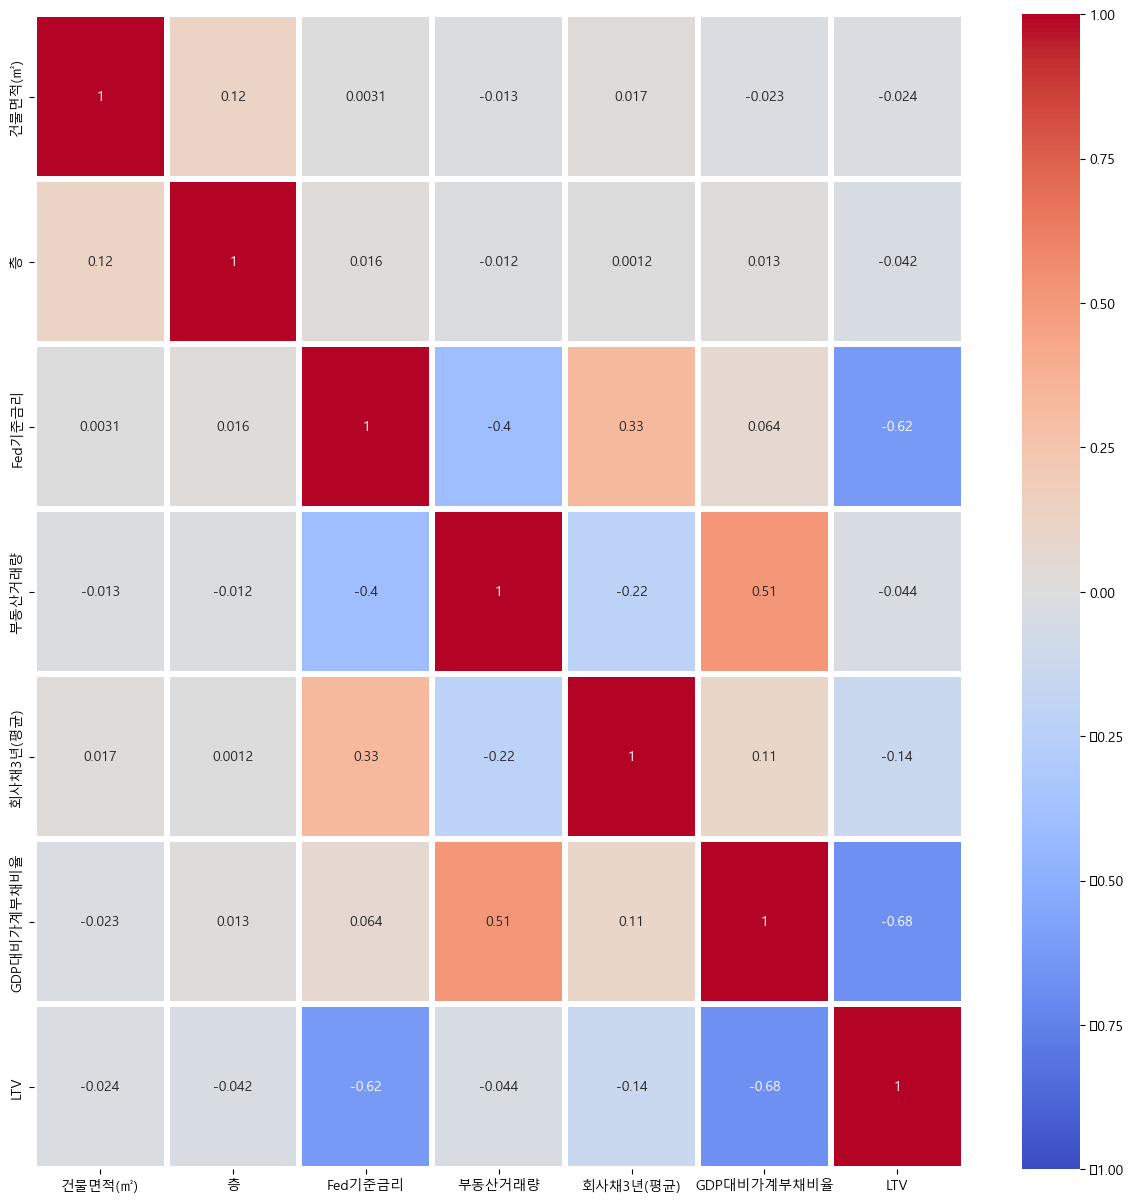

In [37]:
plot_cor(X_scaled)

In [38]:
# 교차 검증 수행
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

mlr = LinearRegression()

cross_val_scores = cross_val_score(mlr, X_scaled, y_scaled, scoring='neg_mean_squared_error', cv=5)
cross_val_rmse_scores = np.sqrt(-cross_val_scores)
avg_cross_val_rmse = np.mean(cross_val_rmse_scores)
print('Average Cross-Validated RMSE: {:.3f}'.format(avg_cross_val_rmse))
print(f'교차검증별 MSE : {np.round(-cross_val_scores,4)}')
print(f'교차검증 평균 MSE : {np.round(np.mean(-cross_val_scores),5)}')
print(f'교차검증별 RMSE : {np.sqrt(np.round(-cross_val_scores,4))}')
print(f'교차검증 평균 RMSE : {np.sqrt(np.round(np.mean(-cross_val_scores),5))}')

Average Cross-Validated RMSE: 0.174
교차검증별 MSE : [0.0231 0.0256 0.0281 0.0402 0.0366]
교차검증 평균 MSE : 0.03072
교차검증별 RMSE : [0.15198684 0.16       0.16763055 0.20049938 0.19131126]
교차검증 평균 RMSE : 0.17527121840165316


In [39]:
X_scaled.columns

Index(['건물면적(㎡)', '층', 'Fed기준금리', '부동산거래량', '회사채3년(평균)', 'GDP대비가계부채비율', 'LTV'], dtype='object')

In [40]:
X_test_scaled=X_test_scaled[X_scaled.columns]

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
mlr = LinearRegression()
# 모델을 훈련하고 교차 검증을 수행
cv_results = cross_validate(mlr, X_scaled, y_scaled, cv=5, return_estimator=True)

# 교차 검증 결과에서 각 폴드에서 훈련된 모델을 가져옴
trained_models = cv_results['estimator']
# 각 폴드에서 훈련된 모델을 테스트 데이터에 적용
for model in trained_models:
    y_pred = model.predict(X_test_scaled)
    # 예측 결과를 활용하여 원하는 작업을 수행
    mse = mean_squared_error(y_test_scaled, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled,y_pred)
    print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
    print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
    print('\n')

MSE : 0.04530257737025228, RMSE :  0.213, MAE: 0.213
Variance score :  0.635


MSE : 0.043975834159138985, RMSE :  0.210, MAE: 0.210
Variance score :  0.646


MSE : 0.04533023405438573, RMSE :  0.213, MAE: 0.213
Variance score :  0.635


MSE : 0.04338369434431651, RMSE :  0.208, MAE: 0.208
Variance score :  0.650


MSE : 0.06047101511768571, RMSE :  0.246, MAE: 0.246
Variance score :  0.513




In [42]:
from sklearn.model_selection import cross_validate

y_pred = trained_models[3].predict(X_test_scaled)

mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))

MSE : 0.04338369434431651, RMSE :  0.208, MAE: 0.208
Variance score :  0.650


In [43]:
# test 계수 결과 DF 

test_result = pd.DataFrame(data= X_test_scaled.columns)
test_result.columns = ['features']

test_result['coefficient'] = trained_models[3].coef_

test_result.sort_values('coefficient', ascending=False)

,features,coefficient
0,건물면적(㎡),2.132184
1,층,0.348058
5,GDP대비가계부채비율,0.090535
3,부동산거래량,0.015619
4,회사채3년(평균),-0.007930
2,Fed기준금리,-0.102597
6,LTV,-0.246404


# 잔차항 검정 
1. 정규성
2. 등분산성
3. 독립성

In [44]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
#matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

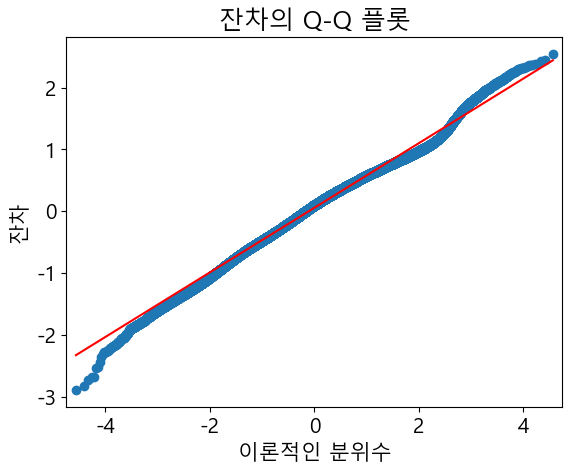

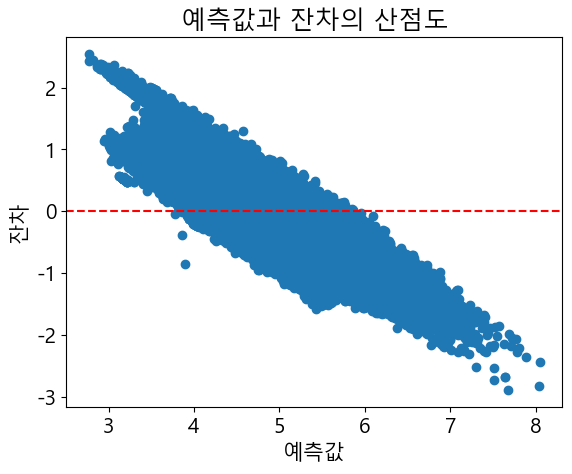

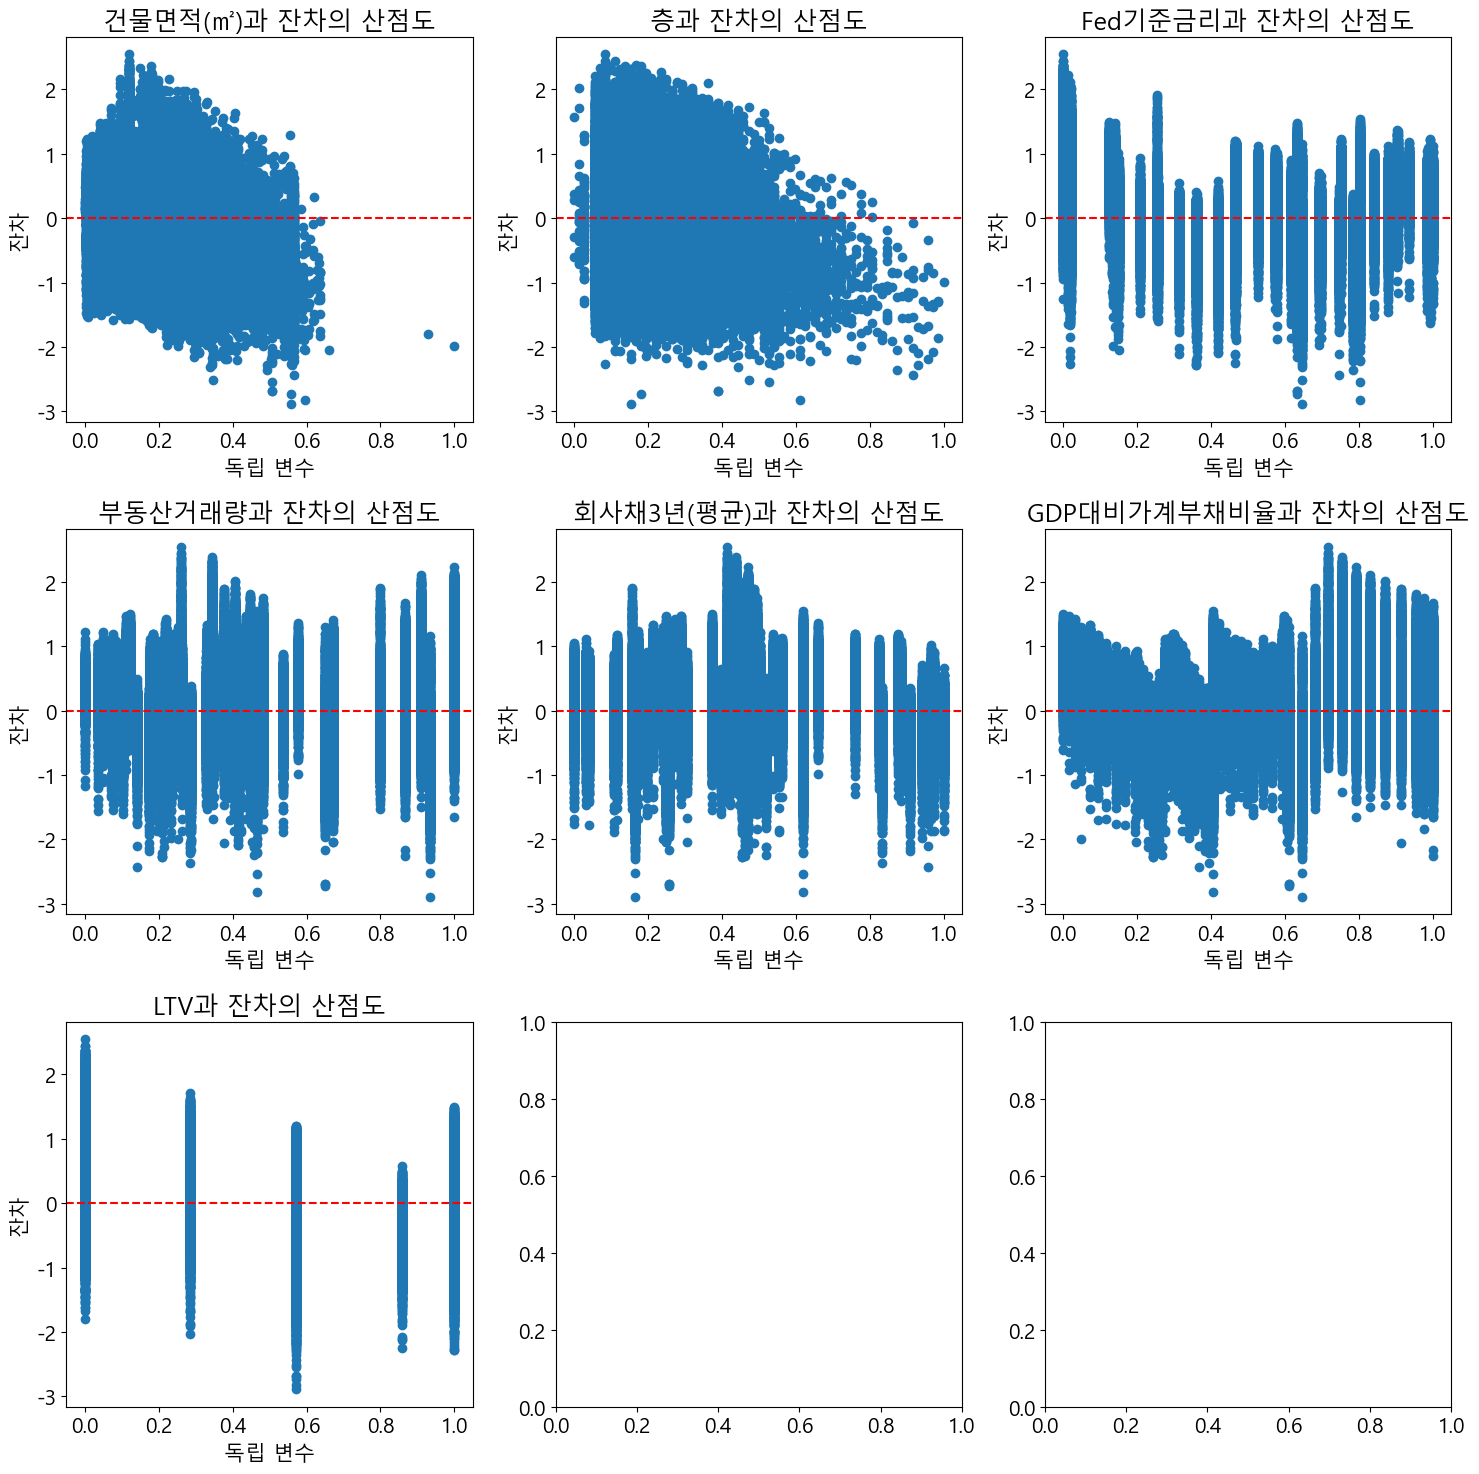

In [45]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

x = X_scaled
y = y_scaled

# 모델 적합
model = sm.OLS(y, x)  # 종속 변수 y와 독립 변수 X를 지정하여 모델 생성
result = model.fit()  # 모델 적합

# 잔차 추출
residuals = result.resid

# 잔차 분석
# 잔차의 정규성 확인: 잔차의 분포를 정규분포와 비교하여 정규성 검정을 수행합니다.
sm.qqplot(residuals, line='s')  # Q-Q plot을 그려서 정규성 확인
plt.xlabel('이론적인 분위수')
plt.ylabel('잔차')
plt.title('잔차의 Q-Q 플롯')
plt.show()

# 잔차의 등분산성 확인: 잔차와 예측값 사이의 관계를 살펴서 등분산성을 확인합니다.
plt.scatter(result.fittedvalues, residuals)
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('예측값과 잔차의 산점도')
plt.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가
plt.show()

# 잔차의 독립성 확인: 잔차와 독립 변수 간의 관계를 살펴서 독립성을 확인합니다.
num_cols = len(x.columns)
num_rows = math.ceil(num_cols / 3)  # 3개의 열로 나누어 출력하고자 한다면
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
for i in range(num_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.scatter(x.iloc[:, i], residuals)
    ax.set_xlabel('독립 변수')
    ax.set_ylabel('잔차')
    ax.set_title(f'{x.columns[i]}과 잔차의 산점도')
    ax.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가

plt.tight_layout()  # 그래프 간격 조정
plt.show()